# Find all missing values in combined sports table and replace them with '0'.

In [2]:
import pandas as pd
file_path1 = './labeled_combined_sports_data.xlsx'
combined_sport_data = pd.read_excel(file_path1)

In [5]:
# find all missing values
df_missing_values = combined_sport_data[combined_sport_data.isnull().any(axis=1)]
print(df_missing_values)

       ID     time  RR       VO2  power      Label
2255   11  880.232 NaN  2.353032    230        GET
2256   11  880.608 NaN  2.353032    230        GET
2257   11  880.988 NaN  2.353032    230        GET
2258   11  881.372 NaN  2.349761    230        GET
2259   11  881.752 NaN  2.349761    230        GET
...    ..      ...  ..       ...    ...        ...
49099  17  698.352 NaN  1.780817      0  Cool down
49100  17  698.692 NaN  1.780817      0  Cool down
49101  17  699.036 NaN  1.780817      0  Cool down
49102  17  699.376 NaN  1.792050      0  Cool down
49103  17  699.720 NaN  1.792050      0  Cool down

[1148 rows x 6 columns]


In [7]:
# replace missing values with '0'
combined_sports_replaced_missing_values = combined_sport_data.fillna(0)
print(combined_sports_replaced_missing_values)

       ID     time     RR       VO2  power      Label
0      11 -168.600  727.0  0.287147      0    Warm Up
1      11 -167.872  728.0  0.287147      0    Warm Up
2      11 -167.148  724.0  0.287147      0    Warm Up
3      11 -166.484  664.0  0.320580      0    Warm Up
4      11 -165.836  648.0  0.320580      0    Warm Up
...    ..      ...    ...       ...    ...        ...
52057  18  947.288  536.0  0.507071      0  Cool down
52058  18  947.816  528.0  0.507071      0  Cool down
52059  18  948.344  528.0  0.507071      0  Cool down
52060  18  948.884  540.0  0.507071      0  Cool down
52061  18  949.424  540.0  0.507071      0  Cool down

[52062 rows x 6 columns]


# Find whether there are any significant difference in VO2 Max between male and female athletes.

Analysis: I have used t-test to compare the significant differences in VO2 max between male and female atheletes. 
A t-test is a statistical test that compares the means of two groups and determines if there is a significant difference between them. In the t-test,  the significance threshold is normally set as 0.05. So, if the t-test result is less than 0.05 , it confirm that there is significant difference betwen the groups.

In [10]:
import pandas as pd
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# open sheet "Athletes" from source file
xls = pd.ExcelFile('./resources/V02Max_Combined.xlsx')
df=pd.read_excel(xls,'Athletes')

# read combined sport data file
df_combined_data=pd.read_excel('combined_sports_data.xlsx')
# merge the two data based on ID
df_merge_file=df.merge(df_combined_data,on='ID',how='inner')
#print(df_merge_file.head())

df_merge_file['VO2max']=df_merge_file['VO2']/df_merge_file['Weight']

#find male and female vo2max value
male_vo2max = df_merge_file[df_merge_file['Gender'] == 'Male']['VO2max'].dropna()
female_vo2max = df_merge_file[df_merge_file['Gender'] == 'Female']['VO2max'].dropna()

#define statistic
df_t_statistics, df_p_value = stats.ttest_ind(male_vo2max, female_vo2max)

# display values
#print(f"statistic: {df_t_statistics}")
print(f"Result : {df_p_value}")

threshold = 0.05
#condition
if df_p_value < threshold:
    print("There is a significant difference in VO2 Max between male and female athletes.")
else:
    print("There is no significant difference in VO2 Max between male and female athletes.")

Result : 5.407866547042615e-184
There is a significant difference in VO2 Max between male and female athletes.


# Visualize the difference in average power between the fencing and triathlon.

Note : This program requires wordcloud module to be installed in the Jupyter notebook and restart kernal. 

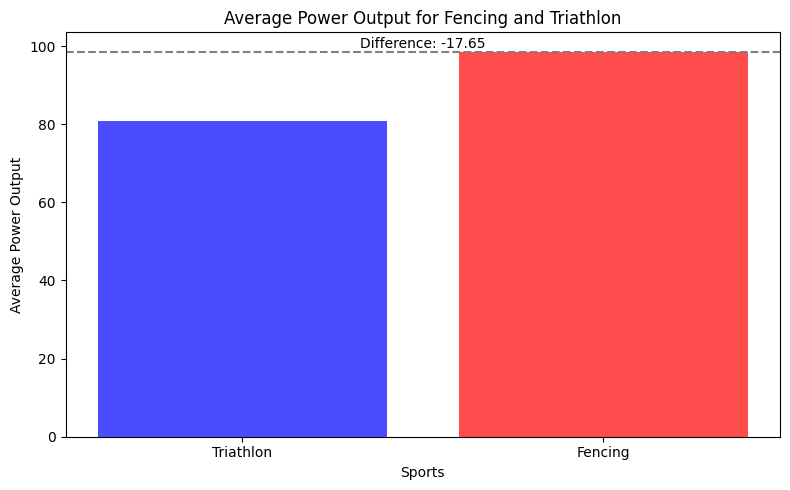

In [25]:
import pandas as pd
import numpy as np
import openpyxl as op
import matplotlib.pyplot as matplot
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

xls = pd.ExcelFile('./resources/V02Max_Combined.xlsx')
df_kayaking = pd.read_excel(xls, 'Kayaking')
df_fencing = pd.read_excel(xls, 'Fencing')
df_triathlon = pd.read_excel(xls, 'Triathlon')
dfAthletes = pd.read_excel(xls, 'Athletes')

df_combined_sport_data = pd.concat([df_kayaking, df_fencing, df_triathlon])

average_power_triathlon = df_triathlon['power'].mean()
average_power_fencing = df_fencing['power'].mean()

categories = ['Triathlon', 'Fencing']
average_values = [average_power_triathlon, average_power_fencing]
difference = average_power_triathlon - average_power_fencing

matplot.figure(figsize=(8, 5))
bars = matplot.bar(categories, average_values, color=['blue', 'red'], alpha=0.7)

matplot.xlabel('Sports')
matplot.ylabel('Average Power Output')
matplot.title('Average Power Output for Fencing and Triathlon')

matplot.axhline(y=average_power_fencing, color='gray', linestyle='--', label='Average Fencing Power Output')
matplot.text(0.5, average_power_fencing + 1, f'Difference: {difference:.2f}', 
         horizontalalignment='center', color='black')
matplot.tight_layout()
matplot.show()